In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [6]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

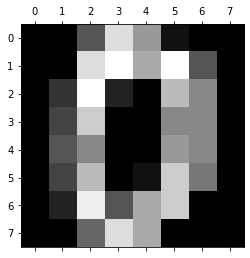

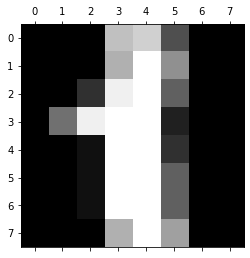

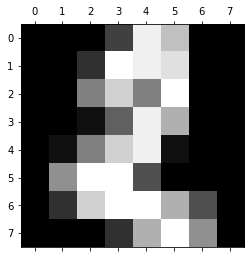

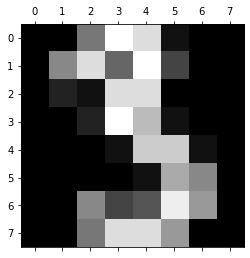

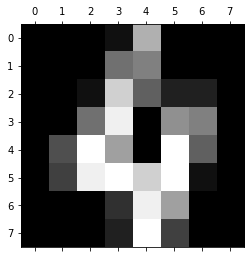

In [10]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [12]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.8)

In [16]:
len(X_train)

1437

In [17]:
len(X_test)

360

In [19]:
from sklearn.linear_model import LogisticRegression

In [22]:
model = LogisticRegression(solver = 'newton-cg', multi_class='auto')

In [23]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
model.score(X_test, y_test)

0.9555555555555556

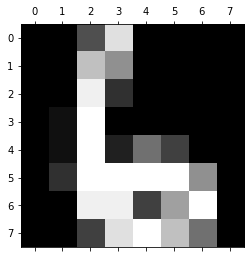

In [25]:
plt.matshow(digits.images[67])

In [26]:
digits.target[67]

6

In [30]:
model.predict([digits.data[67]])

array([6])

In [32]:
 model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [34]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 25,  0,  1,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 30,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 42,  0,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0, 33,  1,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 32,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  0,  1,  1,  0,  2,  1,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 33]])

Text(69.0, 0.5, 'Truth')

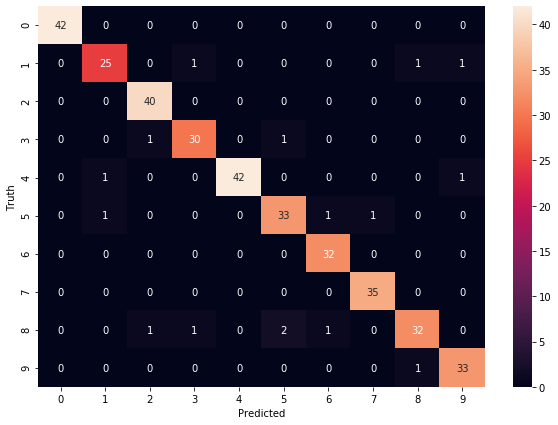

In [36]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')